# Businees Understanding 

# About the project and the data set 

About the data set
 
The dataset comprises patient information collected in an intensive care unit (ICU), with the primary goal of predicting the development of sepsis. It includes various health-related attributes such as plasma glucose, blood work results, blood pressure, body mass index, and patient age. The binary target variable, 'Sepssis,' indicates whether a patient is likely to develop sepsis ('Positive') or not ('Negative'). Features such as insurance status are also present, allowing for an exploration of potential correlations between patient characteristics and the occurrence of sepsis in the ICU.

About the Project

As the final project of the program, this project focuses on the process of creating an API that can be seamlessly integrated with a machine-learning model. This approach is particularly valuable when safeguarding the confidentiality of a model's architecture or when making it accessible to users with existing API integration. Through the creation and deployment of an API, the model gains the capability to receive requests over the internet.

## Analytical Questions 

1. Demographic Analysis:

a. What is the distribution of patients based on age?

b. How is the distribution of patients across different insurance statuses?

c. Is there any correlation between age and the likelihood of developing sepsis?

2. Feature Relationships:

a. Are there any noticeable patterns or correlations between different numerical features (e.g., PRG, PL, PR) and the target variable (Sepssis)?

b. How does the distribution of Plasma Glucose (PRG) differ between patients who develop sepsis and those who don't?

3. Class Distribution:

a. What is the distribution of classes in the target variable (Positive/Negative)?


## Hypothesis:

This study seeks to investigate the impact of key health-related features, including plasma glucose levels, blood pressure, and body mass index (BMI), on the probability of a patient developing sepsis within the intensive care unit (ICU). We hypothesize that variations in these specific health indicators will exhibit statistically significant correlations with the likelihood of sepsis occurrence. By analyzing these relationships, we aim to identify crucial factors contributing to the development of sepsis, thereby informing more targeted and effective medical interventions in the ICU setting

## Installing Packages 

In [ ]:
%pip install pandas matplotlib seaborn
%pip install scipy
%pip install scikit-learn
%pip install imbalanced-learn

## Importing Packages

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#for correlation
from scipy.stats import pointbiserialr

# Data preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# class balancing and data splitting 
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# the machine model 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

# For evaluate the performance of the model
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


## Loading data 

In [4]:
# Loading the train data set and the test data set
train_path = "../data/Paitients_Files_Train.csv"
test_path = "../data/Paitients_Files_Test.csv"

df_train =  pd.read_csv(train_path)

df_test = pd.read_csv(test_path)

# let's look at some information on our data sets

## train set

In [5]:
df_train.info() # getting some info on the data train data set 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [6]:
df_train.shape

(599, 11)

In [7]:
# looking at the head of the train set 
df_train.head(100)

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
95,ICU200105,6,144,72,27,228,33.9,0.255,40,1,Negative
96,ICU200106,2,92,62,28,0,31.6,0.130,24,1,Negative
97,ICU200107,1,71,48,18,76,20.4,0.323,22,1,Negative
98,ICU200108,6,93,50,30,64,28.7,0.356,23,0,Negative


In [8]:
df_train = df_train.drop(['ID'], axis=1) # dropping the ID column

# unique values in the Insurance column 

In [9]:
# here we want to make sure the unique column is already encoded 
unique_ins_values = df_train['Insurance'].unique()

In [10]:
unique_ins_values # the unique values 

array([0, 1], dtype=int64)

# unique values in the Age column 

In [11]:
uniq_age_value = df_train['Age'].unique() # getting the unique values in the age column 
uniq_age_value

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64],
      dtype=int64)

# unique values in the sepssis coulumn

In [12]:
uniq_values_sep = df_train['Sepssis'].unique()
uniq_values_sep  # getting the unique values in the sepssis column 

array(['Positive', 'Negative'], dtype=object)

In [13]:
df_train.describe(include='object') # checking for statistical describtion 

,Sepssis
count,599
unique,2
top,Negative
freq,391


In [14]:
df_train.isnull().sum()  # checking for null values 

PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [15]:
df_train.duplicated().sum() # checking duplicated values 

0

# Exploratory Data Analysis 

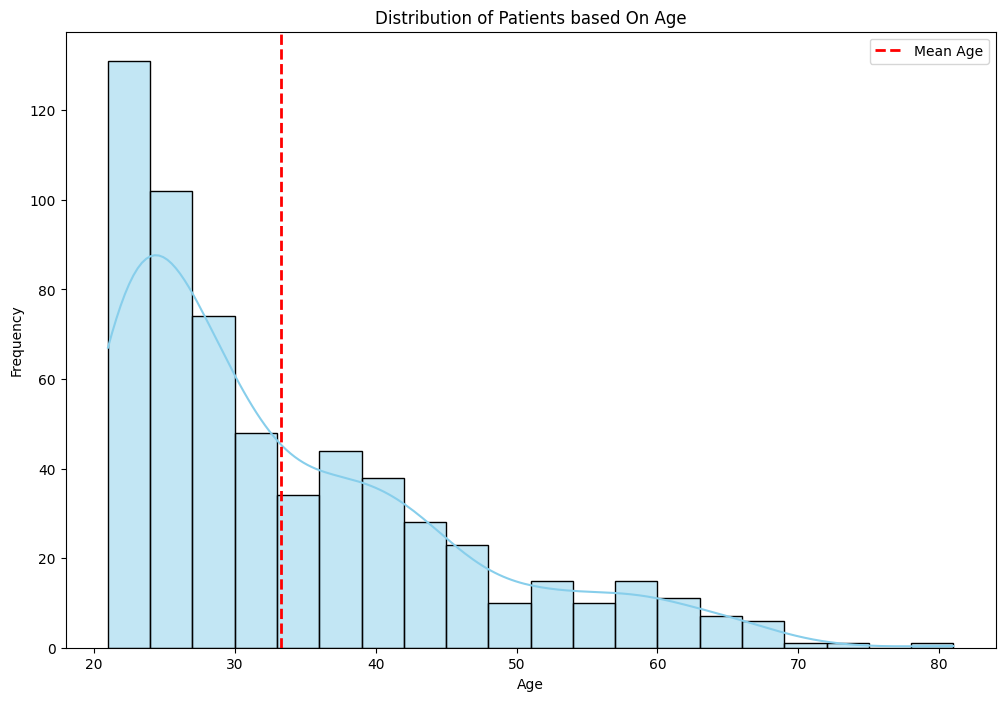

In [16]:
# setting the style for the plots
plt.figure(figsize=(12, 8))
sns.histplot(df_train['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Patients based On Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.axvline(df_train['Age'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean Age')  # add mean age line
plt.legend()  # displaying legend
plt.show()

Frequency (Vertical Axis):

 Each bar in the histogram represents a range of ages, and the height of the bar indicates the frequency or count of patients falling within that age range. The taller the bar, the more patients there are in that particular age range.
Age (Horizontal Axis):

The horizontal axis represents the range of ages in your dataset. Each bin or interval on the axis corresponds to a specific age range. The bins are defined based on the data's minimum and maximum ages, divided into equal intervals (specified by the bins parameter in the histogram).

Outcome:

The age distribution analysis reveals prominent peaks in patient representation within the age ranges of 20 to 30, 30 to 45, and 50 to 69. This suggests a concentration of individuals within these age brackets in the dataset. Interestingly, there is a noticeable decline in patient representation beyond the age of 70, with ages 71 to 80 showing significantly lower participation. This information implies potential age-related patterns in the dataset, emphasizing the importance of considering these age groups in subsequent analyses and model development


## EDA 2:
How is the distribution of patients across different insurance statuses?

C:\Users\BAKU\AppData\Local\Temp\ipykernel_20984\2511894563.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Insurance', data=df_train, palette='viridis')


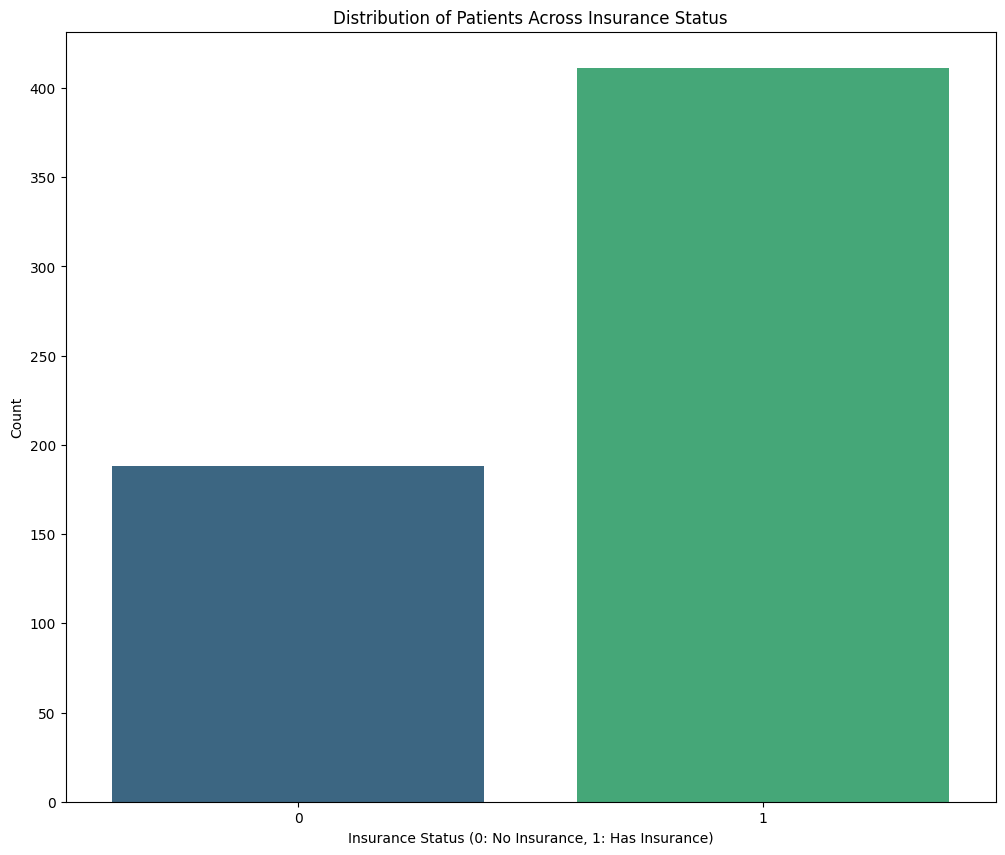

In [17]:
# plotting the distribution of patients across different insurance statuses

plt.figure(figsize=(12, 10))
sns.countplot(x='Insurance', data=df_train, palette='viridis')
plt.title('Distribution of Patients Across Insurance Status')
plt.xlabel('Insurance Status (0: No Insurance, 1: Has Insurance)')
plt.ylabel('Count')
plt.show()

Based on the countplot, it is evident that patients with insurance (category 1) outnumber those without insurance (category 0) in the dataset. This distribution implies that a higher proportion of patients in the dataset have insurance coverage. Understanding the distribution across insurance statuses is crucial for assessing the representativeness of the dataset and may also be relevant when exploring potential correlations between insurance status and the likelihood of developing sepsis or other health-related outcomes.


## 3 Bivariate Analysis 
Is there any correlation between age and the likelihood of developing sepsis?

C:\Users\BAKU\AppData\Local\Temp\ipykernel_20984\2370332485.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sepssis', y='Age', data=df_train, palette='Set2')


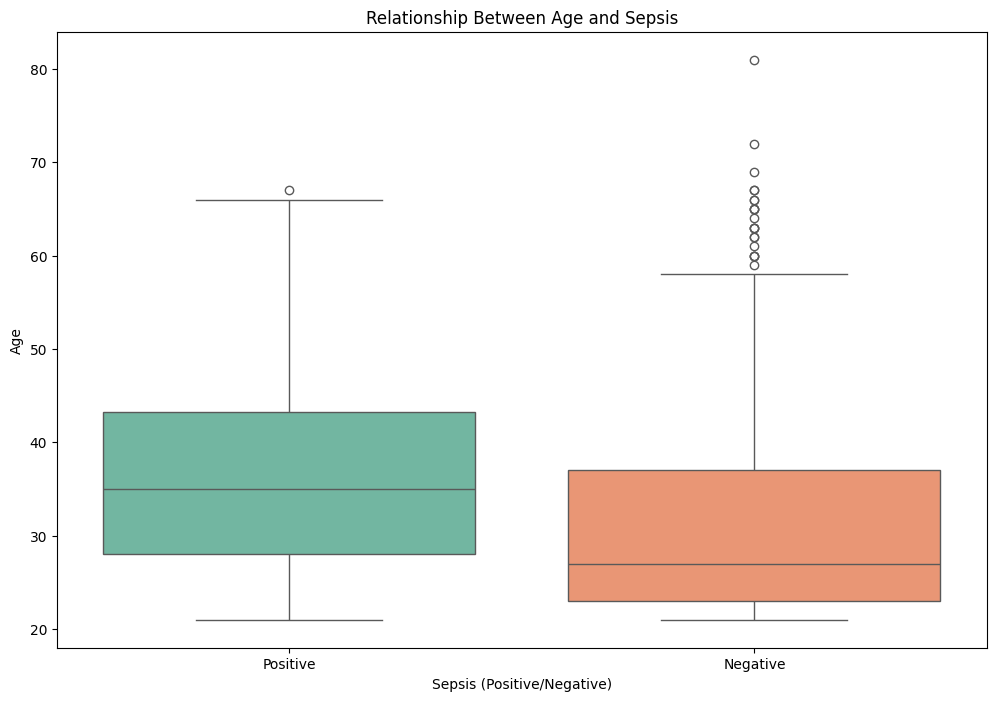

In [18]:
# Plotting a boxplot to show the relationship between age and sepsis
plt.figure(figsize=(12, 8))
sns.boxplot(x='Sepssis', y='Age', data=df_train, palette='Set2')
plt.title('Relationship Between Age and Sepsis')
plt.xlabel('Sepsis (Positive/Negative)')
plt.ylabel('Age')
plt.show()

## Box plot uses and description 

Box (Interquartile Range - IQR):

Top and Bottom of Box: Represent the first quartile (Q1) and third quartile (Q3) of the data, respectively.
Length of Box: Indicates the interquartile range (IQR), the range where the central 50% of the data points lie.
Line Inside Box: Represents the median (Q2) of the dataset.

Whiskers:
Lines Extending from Box: Indicate the minimum and maximum values within a certain range.
Outliers: Individual data points beyond the whiskers are considered outliers.
Outliers:
Individual Points Beyond Whiskers: Potential anomalies or extreme values in the dataset.

Data Points:

Scattered Points: Represent individual data points in the dataset.
Interpretation in the Context of Age and Sepsis:
In the boxplot depicting the relationship between age and sepsis:
The boxes for the 'Positive' and 'Negative' categories show the distribution of ages for patients with and without sepsis.
The medians inside each box give an indication of the central tendency of the age distribution for each category.
The interquartile range (length of the box) provides insight into the spread of ages where the central 50% of patients fall.
Whiskers and outliers help identify any significant deviations or extreme values in the age distribution.
By comparing the boxplots for 'Positive' and 'Negative' categories, you can discern patterns and differences in the age distribution between patients with and without sepsis


## Box Plot visisualization output 

Positive (Sepsis):

The boxplot for patients with sepsis ('Positive') shows a relatively symmetrical distribution of ages. The median is positioned exactly in the middle of the box, indicating that half of the patients with sepsis are younger than the median age, and half are older.
There is one outlier, suggesting a single patient with an age significantly different from the majority.

Negative (No Sepsis):

The boxplot for patients without sepsis ('Negative') has a median that is closer to the bottom of the box. The box is skewed, indicating that the lower half of patients without sepsis tends to be younger, and the upper half is more spread out.
There are several outliers, suggesting a notable number of patients without sepsis whose ages deviate from the central tendency. These observations may indicate potential age-related patterns associated with the likelihood of developing sepsis.


## let's do correlation visualization to confirm the box plot 

# Null Hypothesis (H0): 

"There is no significant correlation between age and the likelihood of developing sepsis in patients within the intensive care unit (ICU)."

# Alternative Hypothesis (H1):

"There is a significant positive correlation between age and the likelihood of developing sepsis in patients within the intensive care unit (ICU)."

# Significance Level (α):

"We will use a significance level of 0.05 to determine statistical significance."
This formulation sets the stage for conducting a statistical test to evaluate whether the observed correlation is statistically significant. If the p-value from the test is less than 0.05, we would reject the null hypothesis in favor of the alternative hypothesis, concluding that there is a significant positive correlation between age and sepsis likelihood


In [19]:
# Calculate point-biserial correlation and p-value
correlation, p_value = pointbiserialr(df_train['Sepssis'].map({'Negative': 0, 'Positive': 1}), df_train['Age'])

# Display the correlation coefficient and p-value 
print(f'Point-Biserial Correlation: {correlation:.2f}')
print(f'P-value: {p_value:.4f}')

Point-Biserial Correlation: 0.21
P-value: 0.0000


The calculated point-biserial correlation coefficient of 0.21 suggests a positive correlation between age and the likelihood of developing sepsis. The positive sign indicates that as age increases, the likelihood of a positive sepsis outcome also tends to increase. The p-value of 0.0000 indicates that this correlation is statistically significant, as it is below common significance levels like 0.05.
In summary, there is evidence to support a positive correlation between age and the likelihood of developing sepsis in your dataset. This information can be valuable for further analyses and model development, as age may be considered an important factor in predicting sepsis outcomes.


# Multivariate Analysis

Are there any noticeable patterns or correlations between different numerical features (e.g., PRG, PL, PR) and the target variable (Sepssis)?

In [ ]:
'''

# the code below is to help us show whether there is any relation between these feature and the target 

# Selecting the relevant columns
numerical_columns = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']

# Creating pair plots to visualize relationships
sns.pairplot(df_train, vars=numerical_columns, hue='Sepssis', palette='husl')
plt.suptitle('Pair Plots of Numerical Features by Sepssis', y=1.02)
plt.show()

# Here we calculate the correlation coefficients
correlation_matrix = df_train[numerical_columns + ['Sepssis']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

'''

# To ensure class balance 

C:\Users\BAKU\AppData\Local\Temp\ipykernel_20984\1882095404.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sepssis', data=df_train, palette=['skyblue', 'lightcoral'])


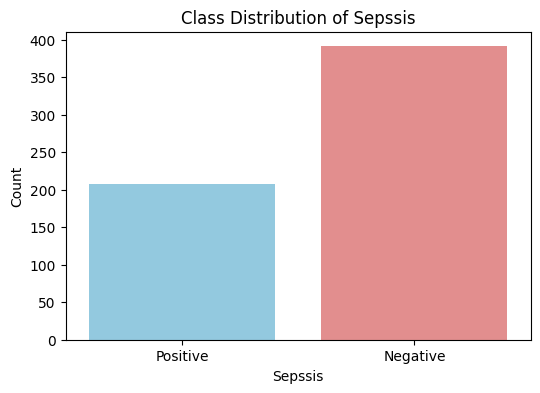

Class Balance:
Sepssis
Negative    391
Positive    208
Name: count, dtype: int64


In [20]:
# Getting the unique value count of the target column 'Sepssis'
class_balance = df_train['Sepssis'].value_counts()

# Plotting class distribution with different colors
plt.figure(figsize=(6, 4))
sns.countplot(x='Sepssis', data=df_train, palette=['skyblue', 'lightcoral'])
plt.title('Class Distribution of Sepssis')
plt.xlabel('Sepssis')
plt.ylabel('Count')
plt.show()

# Displaying the class counts
print("Class Balance:")
print(class_balance)

# From the above output 
we can see clearly that our classes are not balance which may affect our model output

Though the class inbalance is not that wide we can still balance the data set to be at the safer side 

# But first we split

In [21]:
# below we spit our data set
X = df_train.drop('Sepssis', axis=1)
y = df_train['Sepssis']
 
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Preprocessing 

# now let's balance 

In [22]:
# below we balance the class
api_oversampler = RandomOverSampler(sampling_strategy='minority')
X_train_resampled, y_train_resampled = api_oversampler.fit_resample(X_train, y_train)

In [23]:
print(X_train_resampled)

     PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance
0      0  102  75  23    0   0.0  0.572   21          1
1      8  125  96   0    0   0.0  0.232   54          1
2     12  140  82  43  325  39.2  0.528   58          1
3      6  114   0   0    0   0.0  0.189   26          1
4      8  109  76  39  114  27.9  0.640   31          0
..   ...  ...  ..  ..  ...   ...    ...  ...        ...
623    7  147  76   0    0  39.4  0.257   43          1
624    5  166  72  19  175  25.8  0.587   51          1
625    5  189  64  33  325  31.2  0.583   29          1
626    4  117  62  12    0  29.7  0.380   30          1
627    1  181  64  30  180  34.1  0.328   38          0

[628 rows x 9 columns]


In [24]:
print('Sepssis' in X_train_resampled.columns)

False


feature encoding and scaling using pipline 

In [26]:
# we define the numerical and the categorical columns 
numerical_columns = ['Age', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2']
 
# below we create the appropriate transformers
numerical__transformer = StandardScaler()

# below we create a column transformer 
api_preprocessor = ColumnTransformer(
    transformers=[
    ('num', numerical__transformer, numerical_columns)
])

# here we create our pipeline 
api_pipeline = Pipeline([
    ('preprocessor', api_preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42)) # we instantiate our machine model
    
])

# pipeline for svc
pipeline_svc = Pipeline([
    ('preprocessor', api_preprocessor),
    ('classifier', SVC(random_state=42))
])

# pipeline for gb
pipeline_gb = Pipeline([
    ('preprocessor', api_preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Now let's fit our balance train data set to the pipline

In [28]:
api_pipeline.fit(X_train_resampled, y_train_resampled) # here we pass our balance data set through the pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'PRG', 'PL', 'PR',
                                                   'SK', 'TS', 'M11',
                                                   'BD2'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

# Now 
let's do some predicton 

In [29]:
# below we want to do predictions on the test data set X_test
y_pred = api_pipeline.predict(X_test)

# Now 
Let's do some evaluation

# Accuracy Score:
The accuracy_score function computes the accuracy of the classification model. It is the ratio of correctly predicted instances to the total instances.
In this case, y_test contains the true labels, and y_pred contains the predicted labels. 

# Classification Report:

The classification_report function generates a text report with key classification metrics.
It includes metrics such as precision, recall, F1-score, and support for each class.
This report is useful for evaluating the performance of the model for each class.

# Confusion Matrix:

The confusion_matrix function computes the confusion matrix to evaluate the accuracy of the classification.
It shows the number of true positive, true negative, false positive, and false negative predictions.
The confusion matrix table is used to describe the performance of a classification model on a set of test data

In [30]:
# below we will use this code to evaluate the model so see how the model is performing

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7166666666666667

Classification Report:
               precision    recall  f1-score   support

    Negative       0.79      0.75      0.77        77
    Positive       0.60      0.65      0.62        43

    accuracy                           0.72       120
   macro avg       0.70      0.70      0.70       120
weighted avg       0.72      0.72      0.72       120


Confusion Matrix:
 [[58 19]
 [15 28]]


# Interpretation

[[True Negative  False Positive]

 [False Negative True Positive]]

 [[59 18]
 
 [15 28]]

59 instances were correctly classified as Negative (True Negative)

28 instances were correctly classified as Positive (True Positive)

18 instances were incorrectly classified as Positive (False Positive)

15 instances were incorrectly classified as Negative (False Negative)


# Below are the other models 

In [32]:
# Train and evaluate Support Vector Classifier
pipeline_svc.fit(X_train_resampled, y_train_resampled)
y_pred_svc = pipeline_svc.predict(X_test)
print("\nSupport Vector Classifier Accuracy:", accuracy_score(y_test, y_pred_svc))
print("\nSupport Vector Classifier Classification Report:\n", classification_report(y_test, y_pred_svc))
print("\nSupport Vector Classifier Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))


Support Vector Classifier Accuracy: 0.6916666666666667

Support Vector Classifier Classification Report:
               precision    recall  f1-score   support

    Negative       0.80      0.69      0.74        77
    Positive       0.56      0.70      0.62        43

    accuracy                           0.69       120
   macro avg       0.68      0.69      0.68       120
weighted avg       0.71      0.69      0.70       120


Support Vector Classifier Confusion Matrix:
 [[53 24]
 [13 30]]


In [33]:
# Train and evaluate Gradient Boosting Classifier
pipeline_gb.fit(X_train_resampled, y_train_resampled)
y_pred_gb = pipeline_gb.predict(X_test)
print("\nGradient Boosting Classifier Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nGradient Boosting Classifier Classification Report:\n", classification_report(y_test, y_pred_gb))
print("\nGradient Boosting Classifier Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))


Gradient Boosting Classifier Accuracy: 0.7333333333333333

Gradient Boosting Classifier Classification Report:
               precision    recall  f1-score   support

    Negative       0.83      0.74      0.78        77
    Positive       0.61      0.72      0.66        43

    accuracy                           0.73       120
   macro avg       0.72      0.73      0.72       120
weighted avg       0.75      0.73      0.74       120


Gradient Boosting Classifier Confusion Matrix:
 [[57 20]
 [12 31]]
